### Step 1: Importing  Data

In [503]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [504]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [505]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [506]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [507]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Data Preparation
#### Converting some binary variables (Yes/No) to 0/1

In [508]:
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [509]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [510]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [511]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,5022.000000,5022.000000,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,...,0.000108,0.000433,0.000758,0.0,0.0,0.0,14.306252,16.344883,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,...,0.010403,0.020803,0.027515,0.0,0.0,0.0,1.386694,1.811395,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.000000,11.000000,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,15.000000,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,16.000000,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,15.000000,18.000000,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,18.000000,20.000000,0.0,1.000000


#### Checking for Missing Values and Inputing Them

In [512]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping the columns with higher missing values, more than 30%

In [513]:
leads = leads.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [514]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [515]:
# Removing missing value rows less than 5%
leads = leads[~np.isnan(leads['TotalVisits'])]#,'TotalVisits','Page Views Per Visit','Last Activity'])]

In [516]:
leads = leads[~np.isnan(leads['Page Views Per Visit'])]#,'Last Activity'])]

In [517]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       nan, 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [518]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.32
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.53
Specialization                                   15.72
How did you hear about X Education               24.17
What is your current occupation                  29.47
What matters most to you in choosing a course    29.68
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [519]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.0,9103.0,9103.0,9103.000000
mean,617027.742612,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.0,0.000220,0.000110,0.000110,0.000439,0.000769,0.0,0.0,0.0,0.0,0.317258
std,23337.138926,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.0,0.014822,0.010481,0.010481,0.020959,0.027721,0.0,0.0,0.0,0.0,0.465434
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596408.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615278.000000,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637166.000000,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


#### Dropping the columns which are redundant i.e. all values are zero or one

In [520]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique().sort_values(ascending=True)

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Newspaper Article                                   2
Search                                              2
A free copy of Mastering The Interview              2
Digital Advertisement                               2
Through Recommendations                             2
Newspaper                                           2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
X Education Forums                                  2
What matters most to you in choosing a course       3
Lead Origin                                         4
Lead Profile                                        6
What is your current occupat

In [521]:
leads = leads.drop(['Receive More Updates About Our Courses','I agree to pay the amount through cheque','Magazine','Get updates on DM Content','Update me on Supply Chain Content'],1)

In [522]:
# Drop Prospect ID  and Lead Number as they are unique numbers

leads = leads.drop(['Prospect ID','Lead Number'],1)

In [523]:
leads.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.000220,0.000110,0.000110,0.000439,0.000769,0.317258
std,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.014822,0.010481,0.010481,0.020959,0.027721,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [524]:
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.000220,0.000110,0.000110,0.000439,0.000769,0.317258
std,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.014822,0.010481,0.010481,0.020959,0.027721,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1372.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1556.900000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
99%,1.000000,0.000000,1.000000,17.000000,1838.960000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [525]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.32
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.53
Specialization                                   15.72
How did you hear about X Education               24.17
What is your current occupation                  29.47
What matters most to you in choosing a course    29.68
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### There are 6 columns with high missing values. Dropping these columns or dropping null value rows may create some wrong results. Hence we will replace these null values with 'not provided'. If further we find that these columns are not important then we drop them.

In [526]:
leads['Country'] = leads['Country'].fillna('not provided')
leads['Specialization'] = leads['Specialization'].fillna('not provided') 
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].fillna('not provided')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not provided')
leads['Lead Profile'] = leads['Lead Profile'].fillna('not provided')
leads['City'] = leads['City'].fillna('not provided')

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9103 non-null   int64  
 3   Do Not Call                                    9103 non-null   int64  
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [527]:
leads['Lead Source'] = leads['Lead Source'].fillna('not provided')

In [528]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### Checking country columns

In [529]:
leads["Country"].value_counts()

India                   6492
not provided            2324
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [530]:
a=6492/9103*100
a

71.31714819290343

#### As we can see India has more than 71% of total entry count, we can assing 'Other country' value to remaining entries. 

In [531]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:slots(x['Country']), axis = 1)
leads['Country'].value_counts()

outside india    6779
not provided     2324
Name: Country, dtype: int64

In [532]:
# Rechecking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [533]:
# checking the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
not provided           29
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
___________________________________________________
0    8379
1     724
Name: Do Not Email, dtype: int64
___________________________________________________
0    9101
1       2
Name: D

#### The following three columns now have the level 'Select'. Let's check them once again.

In [534]:
leads['Specialization'].value_counts('select')*100

Select                               20.575634
not provided                         15.720092
Finance Management                   10.567945
Human Resource Management             9.205756
Marketing Management                  9.051961
Operations Management                 5.492695
Business Administration               4.383170
IT Projects Management                4.020653
Supply Chain Management               3.800945
Banking, Investment And Insurance     3.680105
Travel and Tourism                    2.219049
Media and Advertising                 2.219049
International Business                1.933429
Healthcare Management                 1.724706
E-COMMERCE                            1.219378
Hospitality Management                1.219378
Retail Management                     1.098539
Rural and Agribusiness                0.801933
E-Business                            0.626167
Services Excellence                   0.439416
Name: Specialization, dtype: float64

In [535]:
leads['How did you hear about X Education'].value_counts('select')*100

Select                   53.982204
not provided             24.167857
Online Search             8.876195
Word Of Mouth             3.822916
Student of SomeSchool     3.405471
Other                     2.043282
Multiple Sources          1.669779
Advertisements            0.768977
Social Media              0.725036
Email                     0.285620
SMS                       0.252664
Name: How did you hear about X Education, dtype: float64

In [536]:
leads['Lead Profile'].value_counts('select')*100

Select                         44.809403
not provided                   29.682522
Potential Lead                 17.126222
Other Leads                     5.294958
Student of SomeSchool           2.636493
Lateral Student                 0.230693
Dual Specialization Student     0.219708
Name: Lead Profile, dtype: float64

In [537]:
leads['City'].value_counts('select')*100

Mumbai                         34.922553
Select                         23.959134
not provided                   15.588268
Thane & Outskirts               8.195101
Other Cities                    7.470065
Other Cities of Maharashtra     4.910469
Other Metro Cities              4.141492
Tier II Cities                  0.812919
Name: City, dtype: float64

#### Where select value is more than 30% it is likely as more than 30% data is not enetered hence we can drop these columns

In [538]:
# dropping Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education', 'City'], axis = 1, inplace = True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   int64  
 3   Do Not Call                                    9103 non-null   int64  
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [539]:
leads.shape

(9103, 21)

In [540]:
leads.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.000220,0.000110,0.000110,0.000439,0.000769,0.317258
std,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.014822,0.010481,0.010481,0.020959,0.027721,0.465434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 3: EDA
### 3.1. Univariate Analysis
#### 3.1.1. Categorical Variables

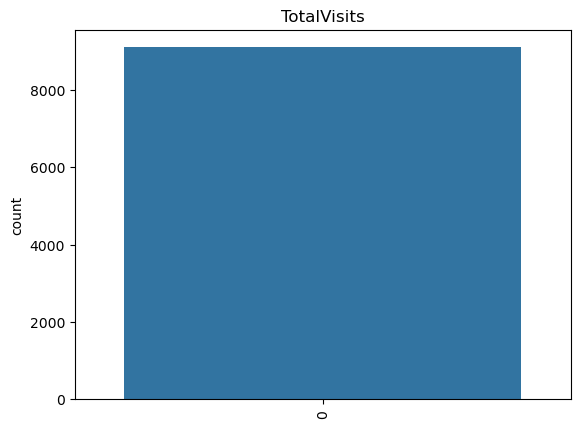

In [541]:
sns.countplot(leads['TotalVisits']).tick_params(axis='x', rotation = 90)
plt.title('TotalVisits')
plt.show()

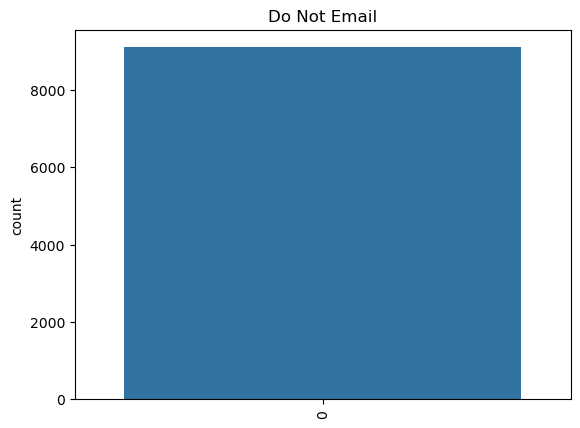

In [542]:
sns.countplot(leads['Do Not Email']).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')
plt.show()


#### 3.1.2. Numerical Variables

In [543]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   int64  
 3   Do Not Call                                    9103 non-null   int64  
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

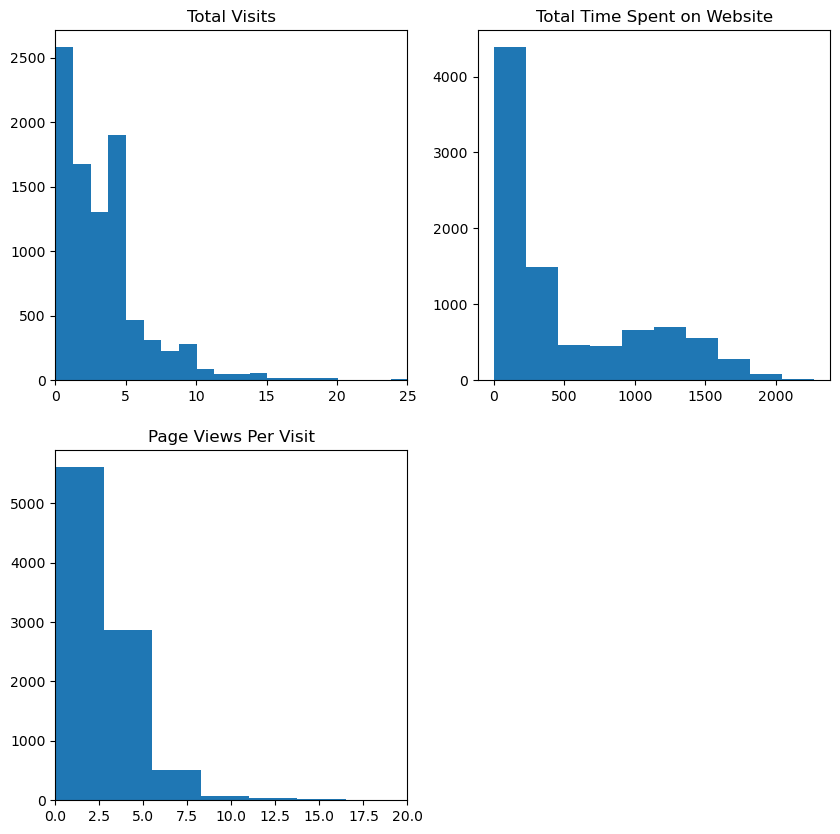

In [544]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 3.2. Relating all the categorical variables to Converted

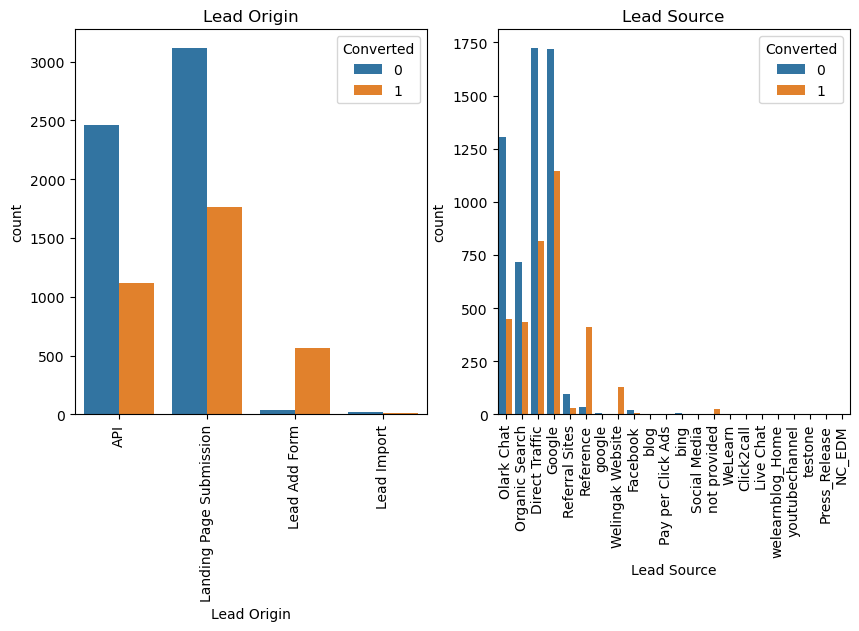

In [545]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data=leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

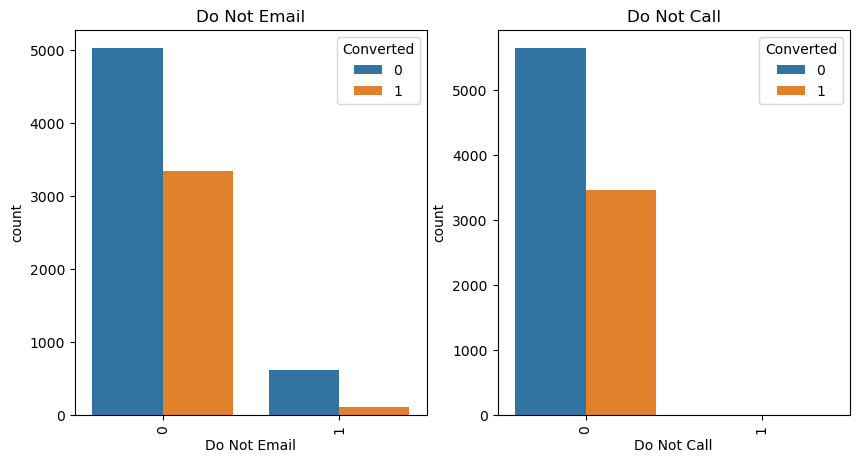

In [546]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

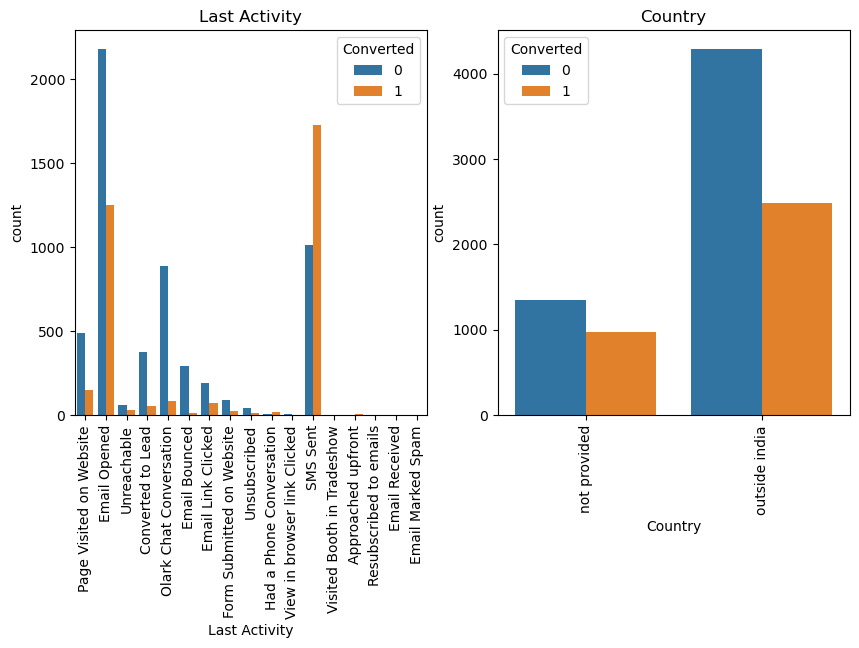

In [547]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

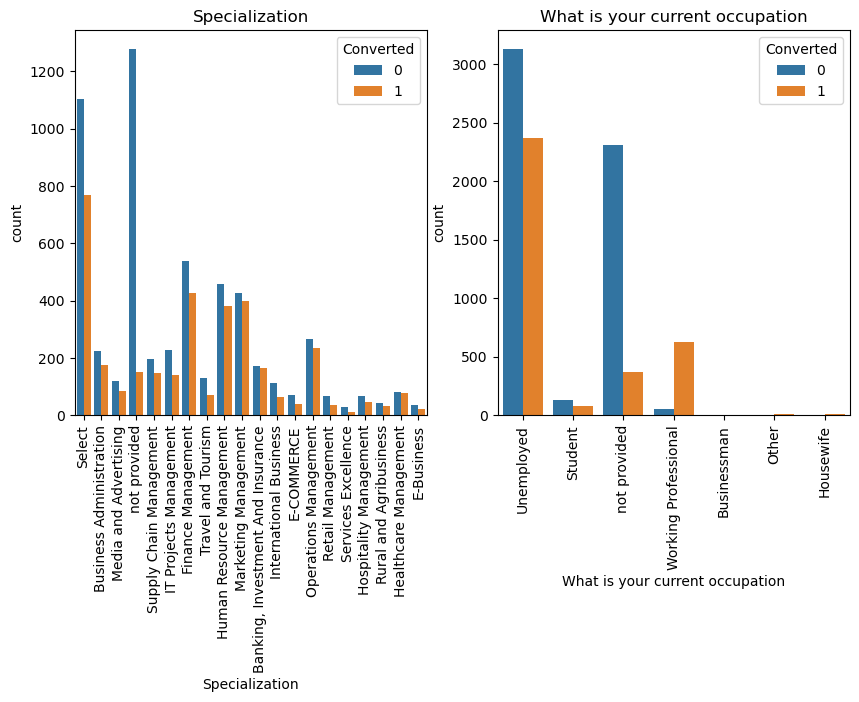

In [548]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

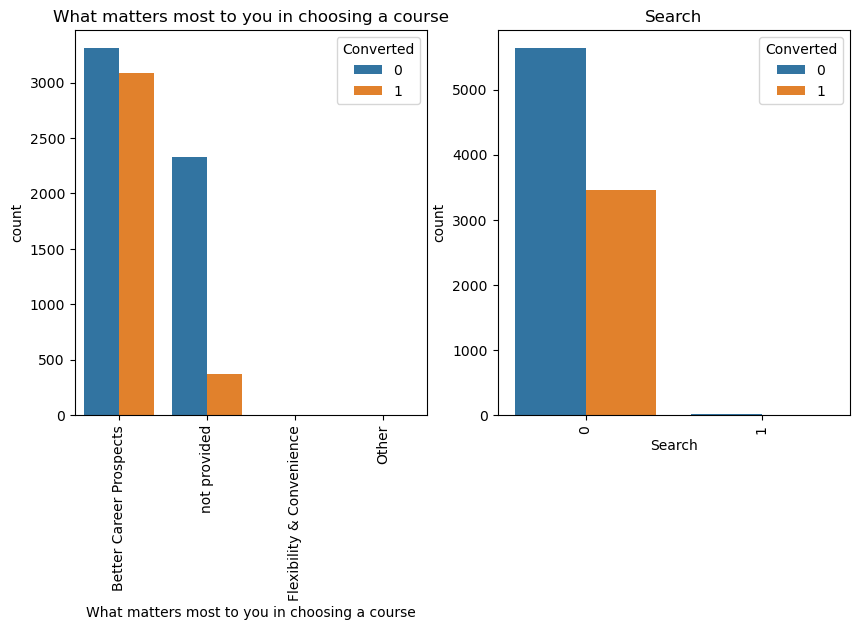

In [549]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

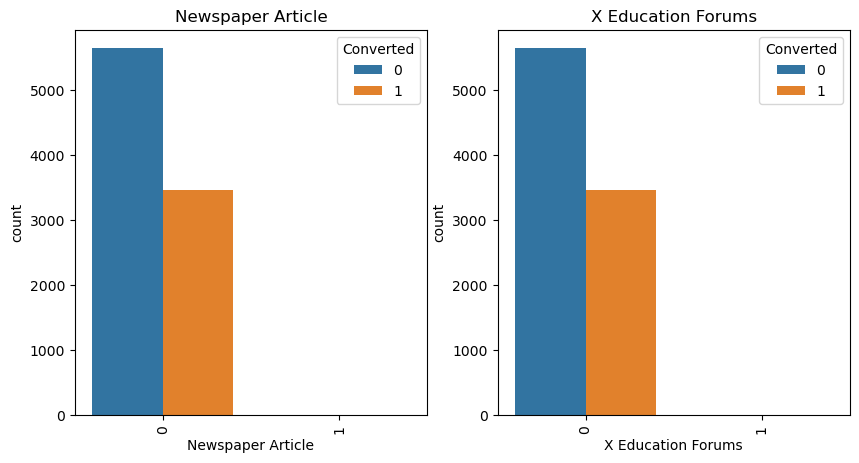

In [550]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

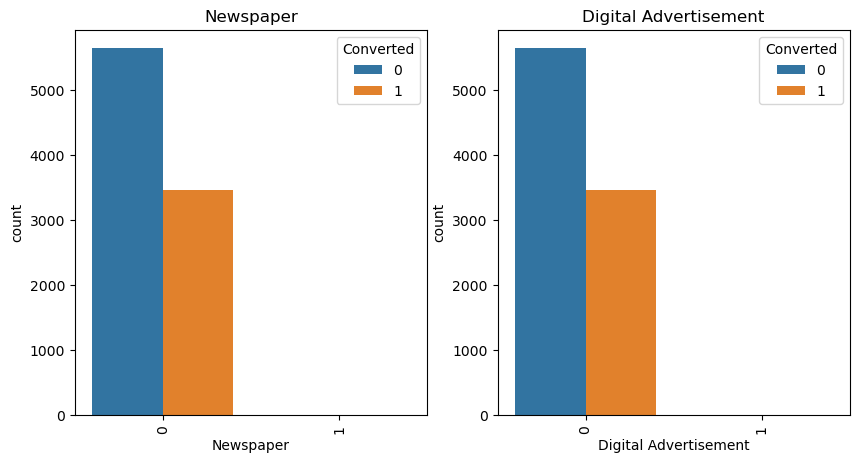

In [551]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

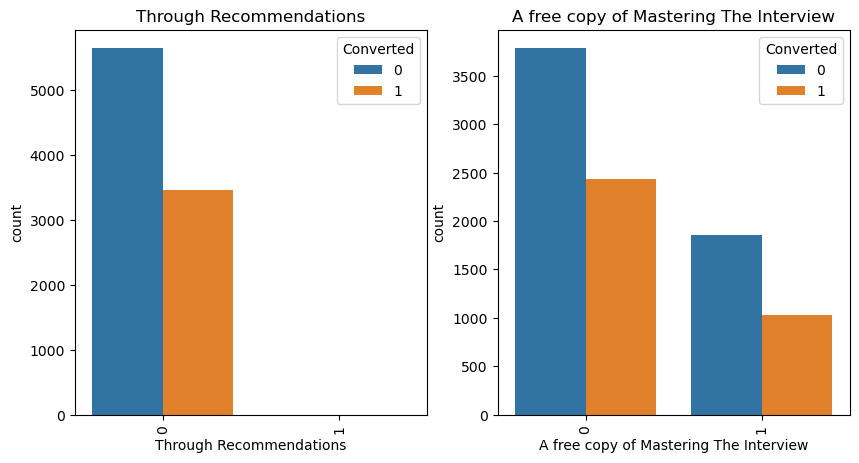

In [552]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

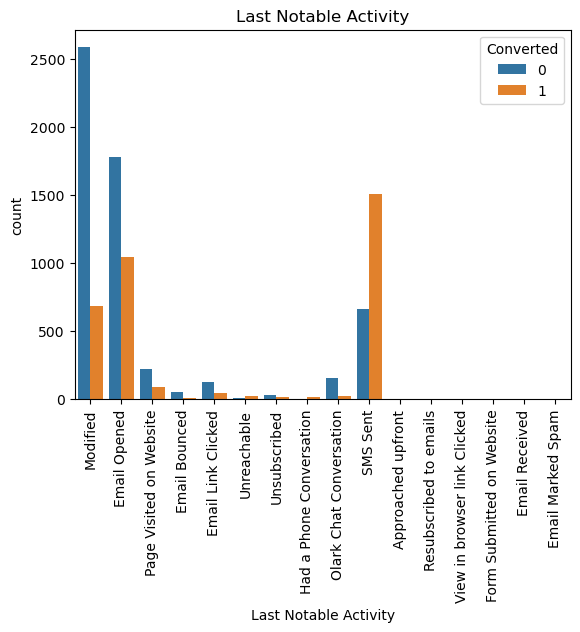

In [553]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

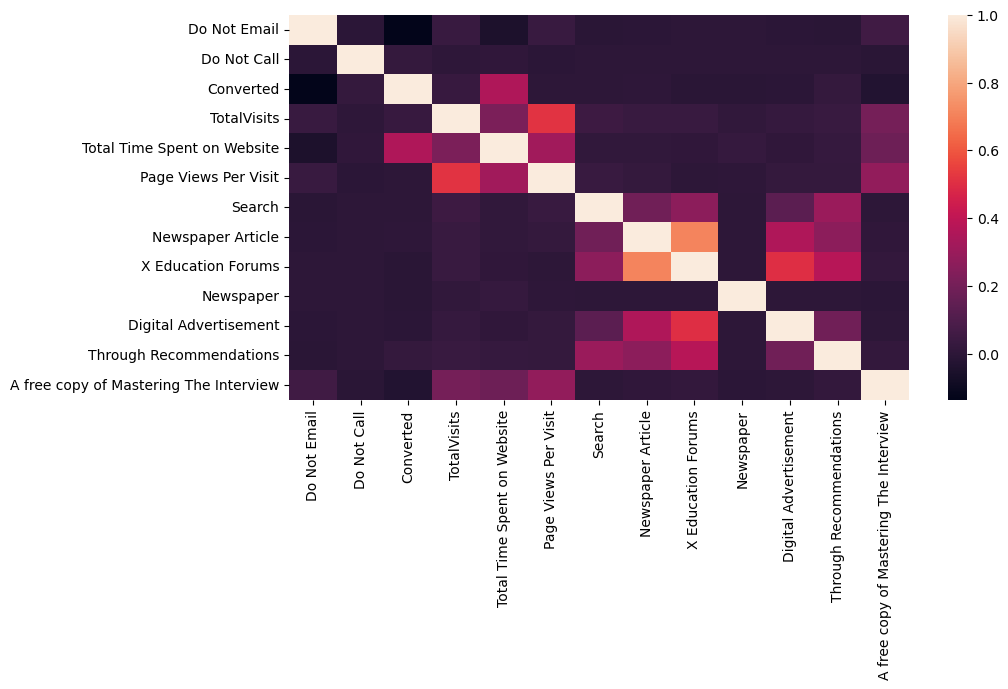

In [554]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr())
plt.show()

## 4. Dummy Variables

In [555]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   int64  
 3   Do Not Call                                    9103 non-null   int64  
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [556]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,not provided,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,outside india,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,outside india,...,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,outside india,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,outside india,...,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


In [557]:
leads.nunique()

Lead Origin                                         4
Lead Source                                        22
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             2
Specialization                                     20
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [558]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'not provided', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [559]:
leads['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,  18.,
        20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,  28.,
        26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [560]:
leads['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [561]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(leads[['Lead Origin','Lead Source' ,'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Search','Newspaper Article','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_dum = pd.concat([leads, dummy], axis=1)
leads_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,outside india,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,outside india,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,outside india,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,outside india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,outside india,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,outside india,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,outside india,...,0,0,0,0,0,0,1,0,0,0


In [562]:
leads_dum = leads_dum.drop(['Lead Origin','Lead Source' ,'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course','Search','Newspaper Article','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity'], 1)
leads_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Newspaper,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [563]:
leads_dum.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'X Education Forums', 'Newspaper',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_not provided', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marke

In [564]:
# Dropping not provided columns

leads_dum = leads_dum.drop(['Lead Source_not provided','Specialization_not provided','What is your current occupation_not provided','What matters most to you in choosing a course_not provided'], 1)

In [565]:
leads_dum.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'X Education Forums', 'Newspaper',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Emai

## 5. Test-Train Split

In [566]:
X = leads_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Newspaper,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [567]:
# Target variable into y
y = leads_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [568]:
# Split the dataset into 70% and 30% for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [569]:
X.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Newspaper,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,...,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820,0.000110,0.000110,0.536746,0.066791,0.003405,0.279358,0.003405,...,0.000110,0.001538,0.359222,0.020103,0.034934,0.000110,0.238603,0.003515,0.005163,0.000110
std,4.854853,545.066142,2.161418,0.010481,0.010481,0.498675,0.249674,0.058260,0.448709,0.058260,...,0.010481,0.039189,0.479799,0.140361,0.183622,0.010481,0.426253,0.059189,0.071673,0.010481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,244.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,919.500000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [570]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Newspaper,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5414,0.007968,0.669454,0.036364,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1411,0.015936,0.555018,0.072727,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2137,0.015936,0.029049,0.024182,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
97,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4949,0.023904,0.569982,0.054545,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 6. Model Building 

In [571]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [572]:
# Import RFE
from sklearn.feature_selection import RFE

In [573]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)           # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [574]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('X Education Forums', False, 59),
 ('Newspaper', False, 7),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', False, 68),
 ('Lead Source_Olark Chat', False, 66),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 71),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 12),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 32),
 ('Lead Source_blog', False, 46),
 ('Lead Source_google', False, 38),
 ('Lead Source_test

In [575]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

#### All the variables selected by RFE, now p-values and the VIFs

In [576]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [577]:
# Importing statsmodels
import statsmodels.api as sm

In [578]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.0
Date:                Thu, 20 Jul 2023   Deviance:                       5407.9
Time:                        20:13:05   Pearson chi2:                 6.43e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3854
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2996      0.100    -22.925      0.000      -2.496      -2.103
TotalVisits                                              6.3949      2.177      2.938      0.003       2.129      10.661
Total Time Spent on Website                              4.6050      0.166     27.765      0.000       4.280       4.930
Lead Origin_Lead Add Form                                2.5726      0.227     11.352      0.000       2.128       3.017
Lead Source_Welingak Website                             2.4769      1.034      2.395      0.017       0.450       4.503
Last Activity_Email Bounced                             -1.6714      0.320     -5.222      0.000      -2.299      -1.044
Last Activity_SMS Sent                                   1.2968      0.073     17.883      0.000       1.155       1.439
Country_outside india                                   -1.2816      0.108    -11.917      0.000      -1.492      -1.071
What is your current occupation_Housewife               25.2138   2.34e+04      0.001      0.999   -4.59e+04     4.6e+04
What is your current occupation_Other                    2.4937      0.753      3.314      0.001       1.019       3.969
What is your current occupation_Student                  1.2583      0.222      5.660      0.000       0.823       1.694
What is your current occupation_Unemployed               1.2553      0.085     14.687      0.000       1.088       1.423
What is your current occupation_Working Professional     3.8045      0.200     18.977      0.000       3.412       4.197
Last Notable Activity_Had a Phone Conversation          24.2733   2.79e+04      0.001      0.999   -5.47e+04    5.47e+04
Last Notable Activity_Olark Chat Conversation           -1.0669      0.345     -3.089      0.002      -1.744      -0.390
Last Notable Activity_Unreachable                        1.9503      0.516      3.780      0.000       0.939       2.962
========================================================================================================================
"""

In [579]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [580]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Country_outside india,4.38
10,What is your current occupation_Unemployed,2.72
1,Total Time Spent on Website,2.39
0,TotalVisits,1.69
2,Lead Origin_Lead Add Form,1.64
5,Last Activity_SMS Sent,1.54
11,What is your current occupation_Working Profes...,1.34
3,Lead Source_Welingak Website,1.29
9,What is your current occupation_Student,1.06
4,Last Activity_Email Bounced,1.05


#### The VIF values are ok but the p-values are note. So removing 'Last Notable Activity had a phone conversation'

In [581]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [582]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.4
Date:                Thu, 20 Jul 2023   Deviance:                       5420.8
Time:                        20:13:05   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3004      0.100    -22.936      0.000      -2.497      -2.104
TotalVisits                                              6.5674      2.200      2.986      0.003       2.256      10.879
Total Time Spent on Website                              4.5987      0.166     27.778      0.000       4.274       4.923
Lead Origin_Lead Add Form                                2.5712      0.227     11.348      0.000       2.127       3.015
Lead Source_Welingak Website                             2.4768      1.034      2.395      0.017       0.450       4.503
Last Activity_Email Bounced                             -1.6765      0.320     -5.239      0.000      -2.304      -1.049
Last Activity_SMS Sent                                   1.2899      0.072     17.806      0.000       1.148       1.432
Country_outside india                                   -1.2777      0.108    -11.876      0.000      -1.489      -1.067
What is your current occupation_Housewife               24.2102   1.42e+04      0.002      0.999   -2.78e+04    2.79e+04
What is your current occupation_Other                    2.4868      0.752      3.305      0.001       1.012       3.961
What is your current occupation_Student                  1.2575      0.222      5.659      0.000       0.822       1.693
What is your current occupation_Unemployed               1.2599      0.085     14.751      0.000       1.093       1.427
What is your current occupation_Working Professional     3.8026      0.200     18.974      0.000       3.410       4.195
Last Notable Activity_Olark Chat Conversation           -1.0707      0.345     -3.100      0.002      -1.748      -0.394
Last Notable Activity_Unreachable                        1.9437      0.516      3.767      0.000       0.932       2.955
========================================================================================================================
"""

In [583]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Country_outside india,4.38
10,What is your current occupation_Unemployed,2.72
1,Total Time Spent on Website,2.39
0,TotalVisits,1.69
2,Lead Origin_Lead Add Form,1.64
5,Last Activity_SMS Sent,1.54
11,What is your current occupation_Working Profes...,1.34
3,Lead Source_Welingak Website,1.29
9,What is your current occupation_Student,1.06
4,Last Activity_Email Bounced,1.05


#### The VIF values are ok but the p-values are note. So removing 'What is your current occupation_Housewife'

In [584]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [585]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.0
Date:                Thu, 20 Jul 2023   Deviance:                       5448.1
Time:                        20:13:06   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3815
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2726      0.099    -22.851      0.000      -2.468      -2.078
TotalVisits                                              6.3855      2.176      2.934      0.003       2.120      10.650
Total Time Spent on Website                              4.5897      0.165     27.821      0.000       4.266       4.913
Lead Origin_Lead Add Form                                2.6538      0.228     11.662      0.000       2.208       3.100
Lead Source_Welingak Website                             2.4092      1.034      2.329      0.020       0.382       4.436
Last Activity_Email Bounced                             -1.6881      0.320     -5.281      0.000      -2.315      -1.062
Last Activity_SMS Sent                                   1.2767      0.072     17.668      0.000       1.135       1.418
Country_outside india                                   -1.2549      0.107    -11.731      0.000      -1.465      -1.045
What is your current occupation_Other                    2.4457      0.752      3.252      0.001       0.972       3.920
What is your current occupation_Student                  1.2150      0.222      5.470      0.000       0.780       1.650
What is your current occupation_Unemployed               1.2213      0.084     14.471      0.000       1.056       1.387
What is your current occupation_Working Professional     3.7615      0.200     18.819      0.000       3.370       4.153
Last Notable Activity_Olark Chat Conversation           -1.0813      0.345     -3.132      0.002      -1.758      -0.405
Last Notable Activity_Unreachable                        1.9232      0.515      3.733      0.000       0.913       2.933
========================================================================================================================
"""

In [586]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Country_outside india,4.36
9,What is your current occupation_Unemployed,2.71
1,Total Time Spent on Website,2.39
0,TotalVisits,1.69
2,Lead Origin_Lead Add Form,1.62
5,Last Activity_SMS Sent,1.54
10,What is your current occupation_Working Profes...,1.34
3,Lead Source_Welingak Website,1.29
4,Last Activity_Email Bounced,1.05
8,What is your current occupation_Student,1.05


#### All the VIF values are good and all the p-values are below 0.05. So we can fix model.

## 7. Creating Prediction

In [587]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5414    0.890322
1411    0.584906
2137    0.111938
97      0.258985
4949    0.850591
2447    0.262869
3529    0.182458
4064    0.093418
7208    0.832381
3436    0.308556
dtype: float64

In [588]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.89032163, 0.58490643, 0.11193768, 0.25898459, 0.85059089,
       0.26286943, 0.18245807, 0.09341774, 0.83238083, 0.30855587])

In [589]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.890322
1,1,0.584906
2,0,0.111938
3,0,0.258985
4,1,0.850591


In [590]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.890322,1
1,1,0.584906,1
2,0,0.111938,0
3,0,0.258985,0
4,1,0.850591,1


## 8. Model Evaluation

In [591]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [592]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3441,  460],
       [ 772, 1699]], dtype=int64)

In [593]:
# Predicted     not_churn    churn
# Actual
# not_churn        3441       460
# churn             772      1699

In [594]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8066541117388575

#### Around 81% accuracy with is a very good value

In [595]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [596]:
# Calculating the sensitivity
TP/(TP+FN)

0.6875758802104411

In [597]:
# Calculating the specificity
TN/(TN+FP)

0.8820815175596001

#### With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 68% and specificity of around 88%.

## 9. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum with ROC

In [598]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [599]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

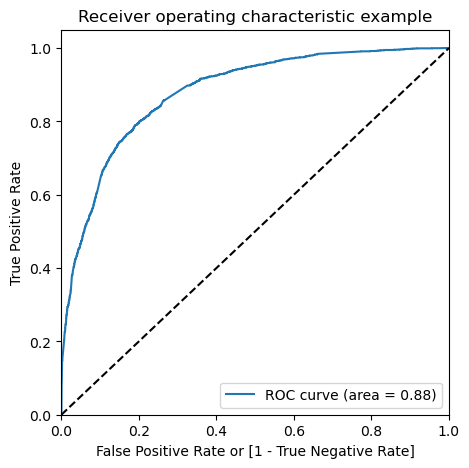

In [600]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [601]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.890322,1,1,1,1,1,1,1,1,1,1,0
1,1,0.584906,1,1,1,1,1,1,1,0,0,0,0
2,0,0.111938,0,1,1,0,0,0,0,0,0,0,0
3,0,0.258985,0,1,1,1,0,0,0,0,0,0,0
4,1,0.850591,1,1,1,1,1,1,1,1,1,1,0


In [602]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.387790,1.000000,0.000000
0.1,0.1,0.594790,0.980575,0.350423
0.2,0.2,0.739328,0.919466,0.625224
0.3,0.3,0.788293,0.828410,0.762881
0.4,0.4,0.805242,0.760826,0.833376
0.5,0.5,0.806654,0.687576,0.882082
0.6,0.6,0.783427,0.573047,0.916688
0.7,0.7,0.770716,0.502226,0.940784
0.8,0.8,0.750157,0.407527,0.967188
0.9,0.9,0.703233,0.253743,0.987952


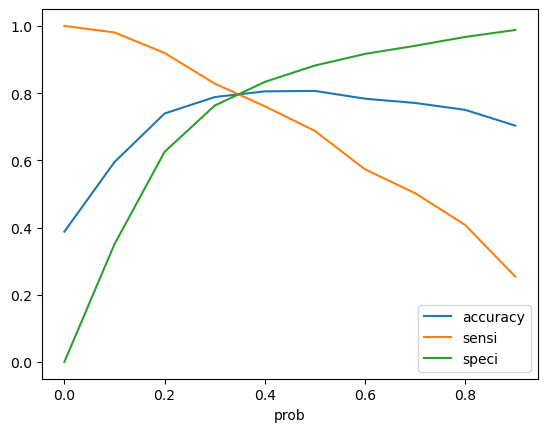

In [603]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [604]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.890322,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.584906,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.111938,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.258985,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.850591,1,1,1,1,1,1,1,1,1,1,0,1


In [605]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7984934086629002

In [606]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3117,  784],
       [ 500, 1971]], dtype=int64)

In [607]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [608]:
# Calculating the sensitivity
TP/(TP+FN)

0.7976527721570215

In [609]:
# Calculating the specificity
TN/(TN+FP)

0.7990258907972315

#### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## 10. Prediction on Test set

In [610]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [611]:
# Substituting all the columns in the final train model
col = X_train.columns

In [612]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Country_outside india,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
5643,1.0,0.003984,0.026408,0,0,1,0,1,0,0,1,0,0,0
7718,1.0,0.023904,0.140845,0,0,0,0,1,0,0,1,0,0,0
4666,1.0,0.011952,0.089789,0,0,0,0,1,0,0,0,0,0,0
3476,1.0,0.023904,0.095511,0,0,0,0,1,0,0,0,0,0,0
4881,1.0,0.015936,0.401849,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1.0,0.015936,0.261884,0,0,0,0,1,0,0,1,0,0,0
8589,1.0,0.003984,0.190141,0,0,0,0,1,0,0,0,0,0,0
54,1.0,0.027888,0.042254,0,0,0,0,1,0,0,0,0,0,0
7376,1.0,0.007968,0.192782,0,0,0,0,1,0,0,1,0,0,0


In [613]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.020885
1,0,0.181368
2,0,0.045690
3,0,0.050377
4,1,0.409417


In [614]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.020885,0
1,0,0.181368,0
2,0,0.045690,0
3,0,0.050377,0
4,1,0.409417,1
...,...,...,...
2726,1,0.268459,0
2727,0,0.067270,0
2728,0,0.040874,0
2729,0,0.202540,0


In [615]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8103258879531308

In [616]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1422,  319],
       [ 199,  791]], dtype=int64)

In [617]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [618]:
# Calculating the sensitivity
TP/(TP+FN)

0.798989898989899

In [619]:
# Calculating the specificity
TN/(TN+FP)

0.816771970132108

#### With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80-81%.

### 11. Precision-Recall

In [620]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3441,  460],
       [ 772, 1699]], dtype=int64)

In [621]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7869383974062065

In [622]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6875758802104411

#### With the current cut off as 0.35 we have Precision around 78% and Recall around 68%

### 11.1. Precision and recall tradeoff

In [623]:
from sklearn.metrics import precision_recall_curve

In [624]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6367    0
 6368    0
 6369    0
 6370    0
 6371    1
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6367    0
 6368    0
 6369    0
 6370    0
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [625]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

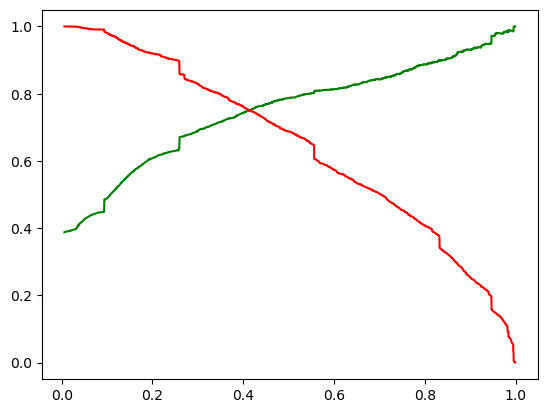

In [626]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [627]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.890322,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.584906,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.111938,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.258985,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.850591,1,1,1,1,1,1,1,1,1,1,0,1


In [628]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8080665411173886

In [629]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3365,  536],
       [ 687, 1784]], dtype=int64)

In [630]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [631]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7689655172413793

In [632]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7219749089437475

#### With the current cut off as 0.45 we have Precision around 77% and Recall around 72%

## 12. Prediction on Test set

In [633]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.020885
1,0,0.181368
2,0,0.045690
3,0,0.050377
4,1,0.409417


In [634]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.020885,0
1,0,0.181368,0
2,0,0.045690,0
3,0,0.050377,0
4,1,0.409417,0
...,...,...,...
2726,1,0.268459,0
2727,0,0.067270,0
2728,0,0.040874,0
2729,0,0.202540,0


In [635]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8183815452215306

In [636]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1513,  228],
       [ 268,  722]], dtype=int64)

In [637]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [638]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.76

In [639]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7292929292929293

#### With the current cut off as 0.45 we have Precision around 76% and Recall around 73%

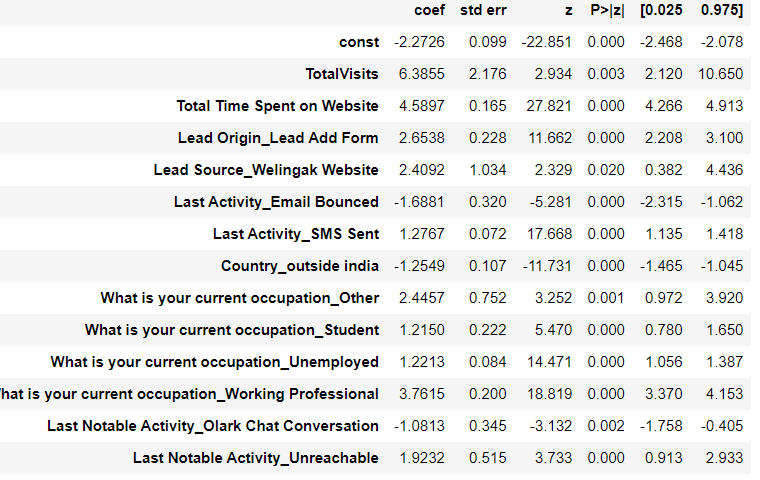

## Conclusion

Below are the variables are most relevent in the analysis.

Below pointers are major in converting so we can target these customers.

1. The total number of visits made by the customer on the website.
2. The total time spent by the customer on the website.
3. Source of lead as Lead Add Form
4. Major source for lead as Welingak Website
5. Occupation as Working Professional

Below pointers are not easy to convert hence we can drop these from our conversion list
1. Those where Email bounced
2. Country other than India
3. Olark Chat conversation

With these variables X Education can have high chances of conversion with correct target customers.